In [1]:
print("hi")

hi


In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.ensemble import BaggingClassifier,\
RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm, model_selection
from matplotlib import pyplot as plt

%matplotlib inline

In [3]:
x,y= make_classification(n_samples=1000,n_features=20,\
                        n_informative=15, n_redundant=5,random_state=5)

print("shape: " , x.shape)
print(x[:3])
print(y[:3])

shape:  (1000, 20)
[[-4.77055040e+00 -1.88685058e+00 -9.60579636e-01  2.53850317e+00
  -6.58430050e+00  3.45711663e+00 -7.46225013e+00  2.01338213e+00
  -4.50863844e-01 -1.89314931e+00 -2.90675203e+00 -2.12145677e-01
  -9.62395597e-01  3.93862591e+00  6.27637494e-02  3.39642691e-01
   4.08356760e+00  1.31423977e+00 -2.17983117e+00  3.10472870e+00]
 [ 1.70511478e+00  2.14718110e+00 -9.04590640e-01  2.13518507e+00
   7.66771352e+00 -4.27022376e+00 -1.66817966e+00 -1.73975132e+00
  -1.79296172e-01 -4.05973884e-02  3.36175170e+00  3.42979130e+00
   1.32074090e+00 -8.37409874e+00 -3.60616478e+00  1.26137599e+00
   6.24413095e-01 -2.85213733e+00  5.52044108e-01 -1.35160618e+00]
 [ 2.95462760e+00 -1.93476243e+00  1.05944606e-03 -1.80275791e+00
  -6.13895058e+00 -9.12323655e+00 -6.28863078e+00  6.95309372e-01
  -8.51369472e-01  6.12541184e+00  2.42147140e+00  2.20799478e-01
  -3.28229578e+00 -7.01272477e+00 -1.93209356e-01 -3.78651063e-01
   1.86543453e+00 -2.90085001e+00 -1.71167414e+00 -5.40

In [4]:
clf = svm.SVC(kernel='linear')
model= BaggingClassifier(base_estimator=clf,n_estimators=10, random_state=7)

results= model_selection.cross_val_score(model, x,y,cv=10)
print(results.mean())
print(results)

0.8450000000000001
[0.84 0.85 0.86 0.91 0.83 0.84 0.74 0.86 0.88 0.84]


In [5]:
dt = DecisionTreeClassifier()
model = BaggingClassifier(base_estimator=dt, n_estimators=10, random_state=7)
results= model_selection.cross_val_score(model,x,y,cv=10)
print(results.mean())
print(results)

0.859
[0.89 0.9  0.89 0.88 0.81 0.86 0.79 0.86 0.88 0.83]


In [6]:
models = {}
n_est = [1,2,5,10,20,50]

for n in n_est:
    models[str(n)] = BaggingClassifier(base_estimator=DecisionTreeClassifier(),\
                                      n_estimators=n)
    
results=[]
names = []

for name,model in models.items():
    scores = model_selection.cross_val_score(model,x,y,cv=10)
    results.append(scores)
    names.append(name)
    print("param: ", name, "mean: ", scores.mean()," std: ",scores.std())


param:  1 mean:  0.783  std:  0.03769615364994155
param:  2 mean:  0.78  std:  0.04494441010848846
param:  5 mean:  0.852  std:  0.04166533331199933
param:  10 mean:  0.873  std:  0.02100000000000002
param:  20 mean:  0.867  std:  0.046054315758677834
param:  50 mean:  0.875  std:  0.030413812651491103


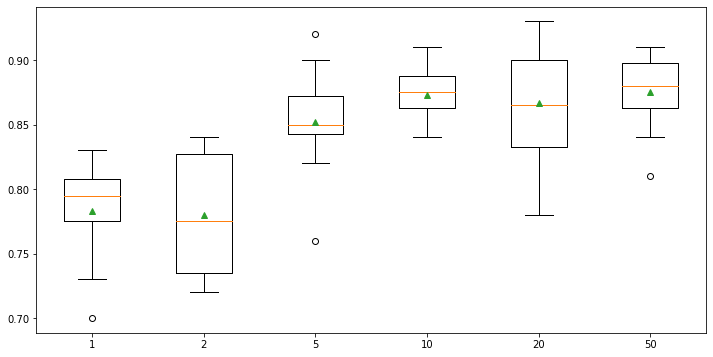

In [7]:
plt.figure(figsize=(12,6))
plt.boxplot(results,labels=names,showmeans=True)
plt.show()

In [8]:
models = {}
for i in np.arange(0.1,1.1,0.1):
    models[str(i)] = BaggingClassifier(max_samples=i)
    
results=[]
names = []

for name,model in models.items():
    scores = model_selection.cross_val_score(model,x,y,cv=10)
    results.append(scores)
    names.append(name)
    print("param: ", name, "mean: ", scores.mean()," std: ",scores.std())

param:  0.1 mean:  0.818  std:  0.03458323293158115
param:  0.2 mean:  0.8320000000000001  std:  0.036551333764994115
param:  0.30000000000000004 mean:  0.844  std:  0.031999999999999994
param:  0.4 mean:  0.829  std:  0.026248809496813363
param:  0.5 mean:  0.852  std:  0.037094473981982824
param:  0.6 mean:  0.8540000000000001  std:  0.022891046284519215
param:  0.7000000000000001 mean:  0.858  std:  0.028213471959331767
param:  0.8 mean:  0.857  std:  0.04290687590584988
param:  0.9 mean:  0.8640000000000001  std:  0.02939387691339814
param:  1.0 mean:  0.8640000000000001  std:  0.041036569057366384


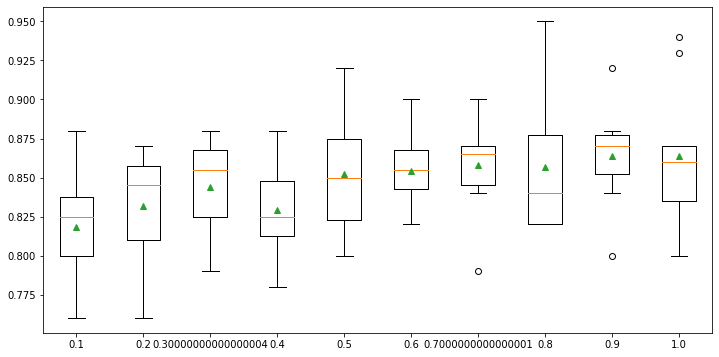

In [9]:
plt.figure(figsize=(12,6))
plt.boxplot(results,labels=names,showmeans=True)
plt.show()

In [10]:
rfc = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0)
results= model_selection.cross_val_score(rfc,x,y,cv=10)
print(results.mean())
print(results)

0.86
[0.86 0.87 0.88 0.89 0.85 0.86 0.75 0.89 0.89 0.86]


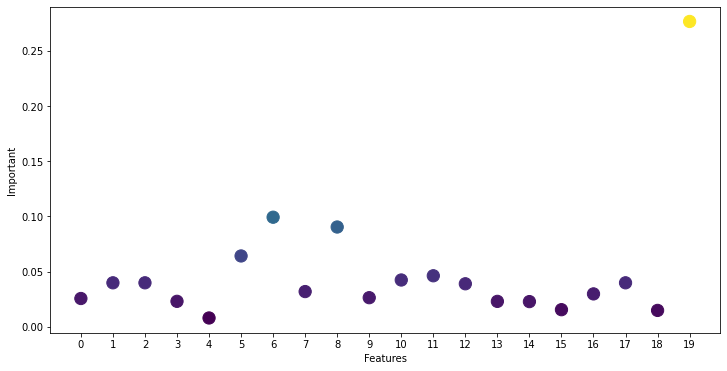

In [11]:
plt.figure(figsize=(12,6))
importances= rfc.fit(x,y).feature_importances_
plt.scatter(range(0,20), importances, s=150, c=importances)
plt.xlabel("Features")
plt.ylabel("Important")
plt.xticks(range(0,20))
plt.show()

In [12]:
dt = DecisionTreeClassifier(max_depth=8)
clf = AdaBoostClassifier(base_estimator=dt, n_estimators=100,\
                        random_state=0)
results= model_selection.cross_val_score(clf,x,y,cv=10)
print(results.mean())
print(results)

0.916
[0.91 0.93 0.95 0.94 0.93 0.93 0.82 0.9  0.94 0.91]


In [13]:
df = pd.read_csv('C:/Users/Gabor/egyetem/5felev_20_21_osz/bigData/gyak10/UN.csv')

In [14]:
df.head()

,country,region,tfr,contraception,educationMale,educationFemale,lifeMale,lifeFemale,infantMortality,GDPperCapita,economicActivityMale,economicActivityFemale,illiteracyMale,illiteracyFemale
0,Afghanistan,Asia,6.90,NaN,NaN,NaN,45.0,46.0,154.0,2848.0,87.5,7.2,52.800,85.00
1,Albania,Europe,2.60,NaN,NaN,NaN,68.0,74.0,32.0,863.0,NaN,NaN,NaN,NaN
2,Algeria,Africa,3.81,52.0,11.1,9.9,67.5,70.3,44.0,1531.0,76.4,7.8,26.100,51.00
3,American.Samoa,Asia,NaN,NaN,NaN,NaN,68.0,73.0,11.0,NaN,58.8,42.4,0.264,0.36
4,Andorra,Europe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
df.describe()

,tfr,contraception,educationMale,educationFemale,lifeMale,lifeFemale,infantMortality,GDPperCapita,economicActivityMale,economicActivityFemale,illiteracyMale,illiteracyFemale
count,197.000000,144.000000,76.000000,76.000000,196.00000,196.000000,201.000000,197.000000,165.000000,165.000000,160.000000,160.000000
mean,3.528782,43.430556,11.410526,11.275000,63.62551,68.391837,43.477612,6261.954315,76.460606,46.794545,17.554662,27.906200
std,1.761974,23.706732,3.049834,3.475135,9.78687,11.041234,38.756041,9355.659390,7.687047,16.810472,17.813000,26.580664
min,1.190000,2.000000,3.300000,2.000000,36.00000,39.100000,2.000000,36.000000,51.200000,1.900000,0.200000,0.200000
25%,1.950000,21.000000,9.750000,9.325000,57.37500,59.600000,12.000000,442.000000,72.300000,37.000000,2.952000,4.847000
50%,3.070000,47.000000,11.250000,11.650000,66.50000,72.150000,30.000000,1779.000000,76.800000,48.400000,10.829000,20.100000
75%,4.980000,64.000000,13.900000,13.650000,70.90000,76.425000,66.000000,7272.000000,81.200000,56.400000,27.575000,48.025000
max,8.000000,86.000000,17.200000,17.800000,77.40000,82.900000,169.000000,42416.000000,93.000000,90.600000,79.100000,93.400000


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 207 non-null    object 
 1   region                  207 non-null    object 
 2   tfr                     197 non-null    float64
 3   contraception           144 non-null    float64
 4   educationMale           76 non-null     float64
 5   educationFemale         76 non-null     float64
 6   lifeMale                196 non-null    float64
 7   lifeFemale              196 non-null    float64
 8   infantMortality         201 non-null    float64
 9   GDPperCapita            197 non-null    float64
 10  economicActivityMale    165 non-null    float64
 11  economicActivityFemale  165 non-null    float64
 12  illiteracyMale          160 non-null    float64
 13  illiteracyFemale        160 non-null    float64
dtypes: float64(12), object(2)
memory usage: 22

In [17]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39 entries, 2 to 199
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 39 non-null     object 
 1   region                  39 non-null     object 
 2   tfr                     39 non-null     float64
 3   contraception           39 non-null     float64
 4   educationMale           39 non-null     float64
 5   educationFemale         39 non-null     float64
 6   lifeMale                39 non-null     float64
 7   lifeFemale              39 non-null     float64
 8   infantMortality         39 non-null     float64
 9   GDPperCapita            39 non-null     float64
 10  economicActivityMale    39 non-null     float64
 11  economicActivityFemale  39 non-null     float64
 12  illiteracyMale          39 non-null     float64
 13  illiteracyFemale        39 non-null     float64
dtypes: float64(12), object(2)
memory usage: 4.6

In [18]:
from sklearn.preprocessing import  StandardScaler
from sklearn.cluster import KMeans

scaler =StandardScaler()

train= scaler.fit_transform(df[['lifeMale','lifeFemale','infantMortality','GDPperCapita']])

models = []
for k in range(1,11,1):
    kmeans = KMeans(n_clusters=k, n_init=5)
    kmeans.fit(train)
    models.append(kmeans)

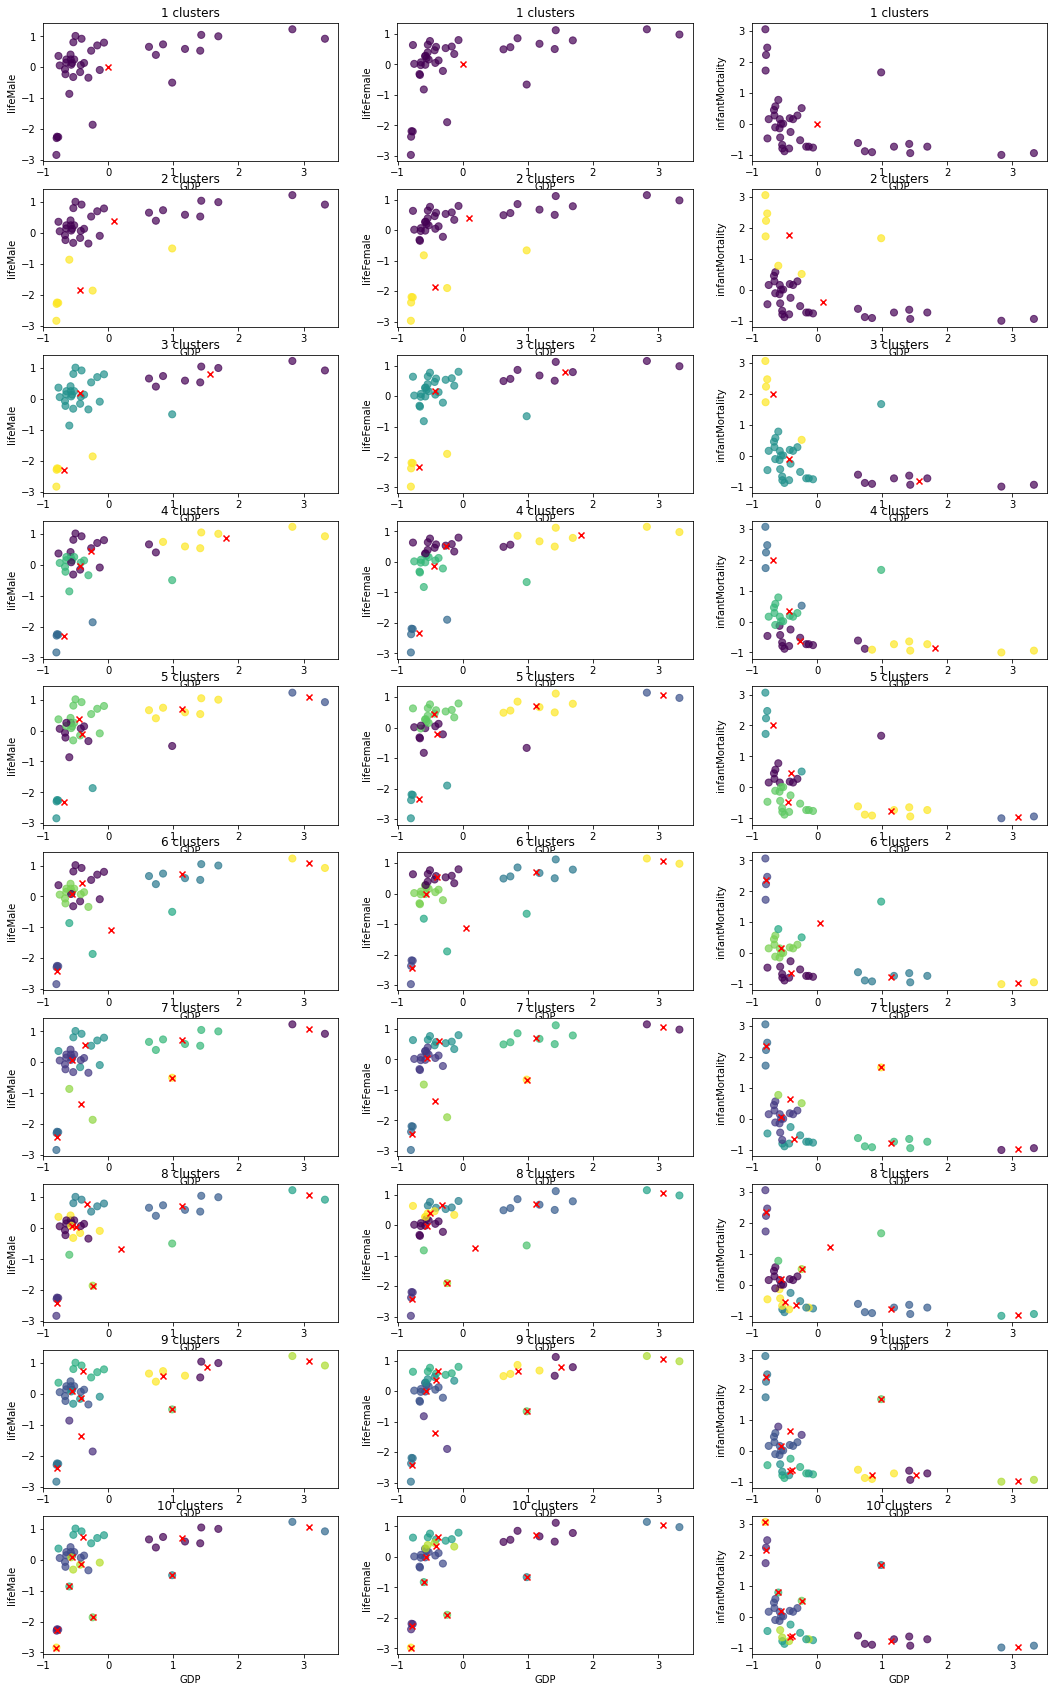

In [19]:
fig, axes = plt.subplots(10,3,figsize=(18,30))
for j in range(10):
    _model =models[j]
    clusters =_model.predict(train)
    centers =_model.cluster_centers_
    n=0
    for c in ['lifeMale','lifeFemale','infantMortality']:
        axes[j][n].scatter(x=train[:,3],y=train[:,n], s=50, alpha=0.7, c=clusters)
        
        for _c in centers:
            axes[j][n].scatter(x=_c[3],y=_c[n], c='r',alpha=1.0,marker='x')
        
        axes[j][n].set_title(str(j+1)+" clusters")
        axes[j][n].set_xlabel('GDP')
        axes[j][n].set_ylabel(c)
        n+=1
plt.show()

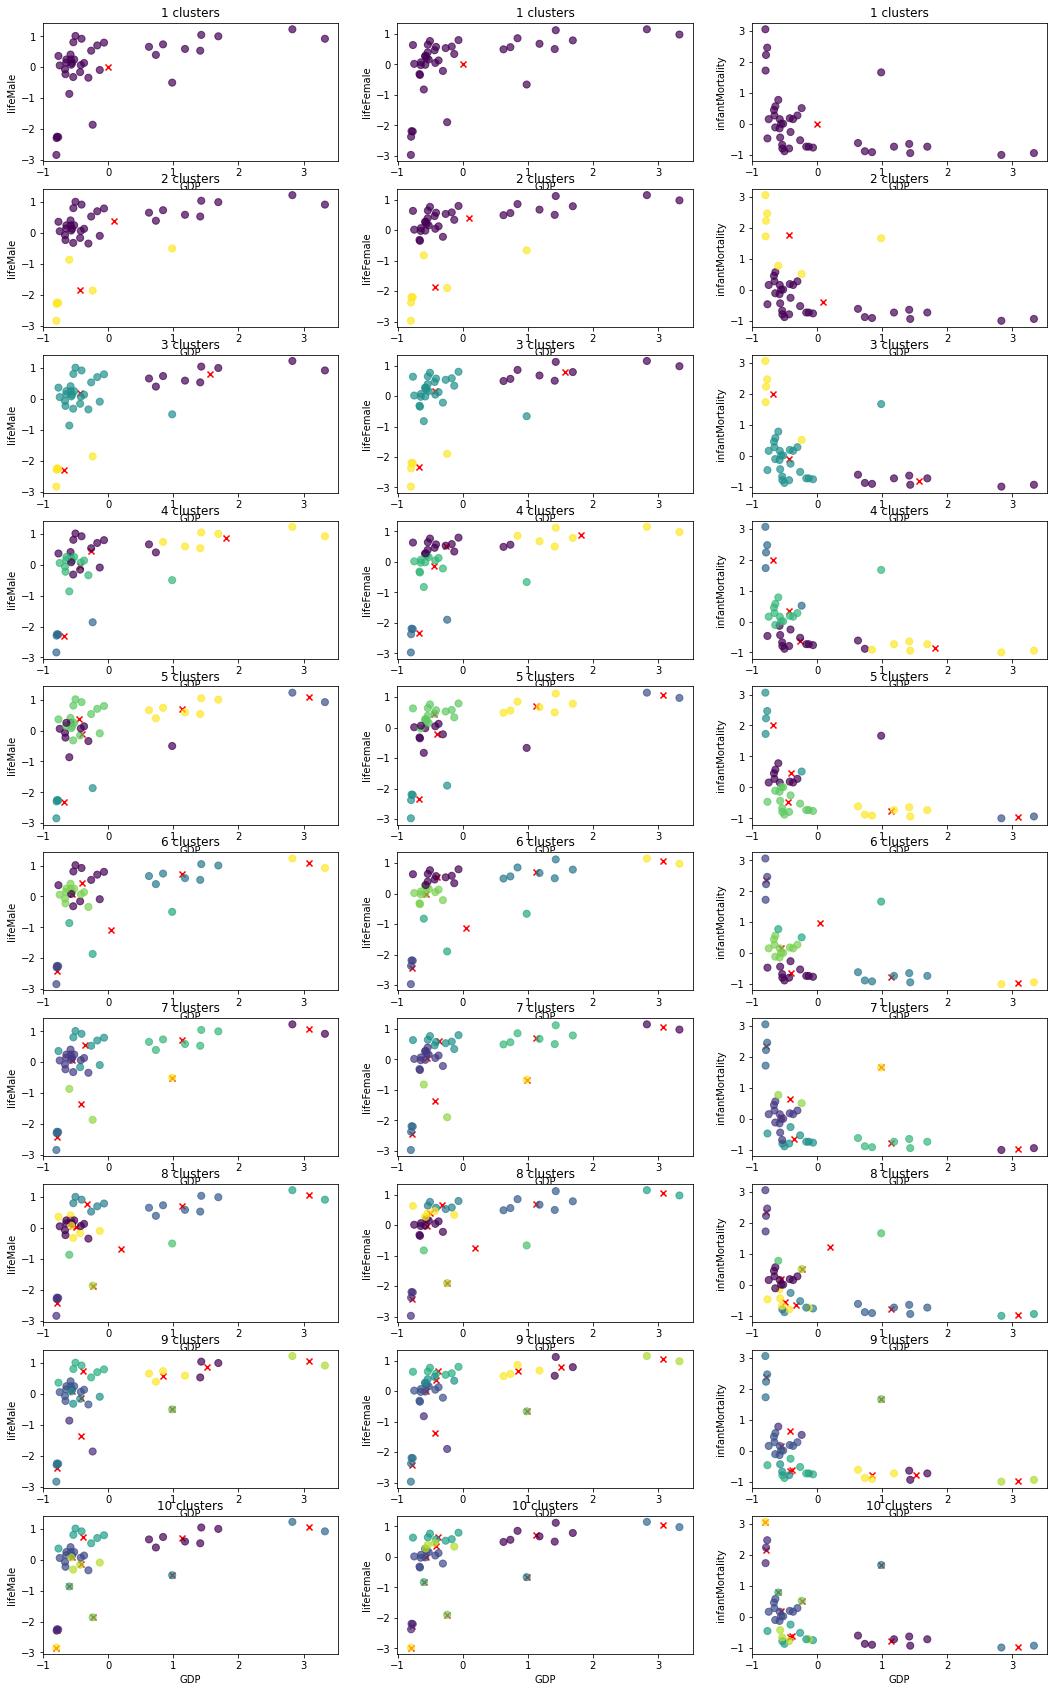

In [20]:
fig, axes = plt.subplots(10,3, figsize=(18,30))
for j in range(10):
    _model = models[j]
    clusters= _model.predict(train)
    centers = _model.cluster_centers_
#    print(centers)
    n=0
    for c in ['lifeMale','lifeFemale', 'infantMortality']:
        for _c in centers:
            axes[j][n].scatter(x=_c[3],y=_c[n], c="r", alpha=1, marker='x')
        axes[j][n].scatter(x=train[:,3],y=train[:,n], s=50, c=clusters, alpha=0.7)
        axes[j][n].title.set_text(str(j+1)+" clusters")
        axes[j][n].set_xlabel('GDP')
        axes[j][n].set_ylabel(c)
        n+=1
plt.show()